# Case Study no.2
Alexopoulos Angelos


## 1. Import Libraries
---

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import itertools
import operator

## 2.Import of Dataset
---

#### 2.1 Data Loading

In [96]:
df = pd.read_csv('casestudy.csv', index_col = 0)


#### 2.2 Data Description

In [97]:
print("The size of the dataset is", df.shape )
df.describe()

The size of the dataset is (685927, 3)


,net_revenue,year
count,685927.000000,685927.000000
mean,125.647755,2016.027252
std,71.854528,0.837203
min,1.000000,2015.000000
25%,63.510000,2015.000000
50%,125.730000,2016.000000
75%,187.820000,2017.000000
max,250.000000,2017.000000


#### 2.3 Check for null valuess

In [98]:
null = df.columns[df.isnull().any()].tolist()

print("The columns that have null values are",len(null), "and are", null)

The columns that have null values are 0 and are []


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685927 entries, 0 to 685926
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   customer_email  685927 non-null  object 
 1   net_revenue     685927 non-null  float64
 2   year            685927 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 20.9+ MB


##3.Result for each year

In [100]:
groups=df.groupby('year').sum()
print(groups)


      net_revenue
year             
2015  29036749.19
2016  25730943.59
2017  31417495.03


In [101]:
# for each group, sum the Net_Revenue column and print the total revenue

total_revenue = groups['net_revenue'].sum()
print(f'Total revenue for : {total_revenue}')

Total revenue for : 86185187.81


In [102]:
def print_results(year, customers_current, revenue_current, revenue_previous, new_customers, per_new_customers, 
                  new_customer_revenue, per_new_customer_revenue,
                  existing_customers, per_existing_customers, exist_curr_revenue,
                  exist_prev_revenue, growth_current, lost_customers, revenue_lost, 
                  customers_previous):
  
  print('The requested year is ' + str(year) + ' and I have the following results ')
  print(' Number of customers for requested  Year:                 ', customers_current)
  print(' Number. of customers for requested previous Year:        ', customers_previous)
  print(' Number. of new customers:                                ', new_customers)
  print(' Percentage of new customers:                             ', per_new_customers)
  print(' Number of existing customers from previous Year:        ', existing_customers)
  print(' Percentage of Existing Customers from previous Year:     ', per_existing_customers)
  print(' Number. of Lost Customers:                               ', lost_customers)
  print(' Total Revenue :                                          ', revenue_current)
  print(' Total Revenue for previous Year:                         ', revenue_previous)
  print(' New Customer Revenue in :                                ', new_customer_revenue)
  print(' Percentage of New Customer Revenue:                      ', per_new_customer_revenue)
  print(' Total Revenue of Existing Customers :                    ', exist_curr_revenue)
  print(' Total Revenue of Existing Customers for previous Year:   ', exist_prev_revenue)
  print(' Total Revenue Lost due to Attrition :                    ', revenue_lost)
  print(' Existing customer growth :                               ', growth_current)
  
  return 

In [103]:
#2016
year=2016
prev_year=2015
df_curr_year = df[(df['year'] == year)]
df_previous_year = df[(df['year'] == prev_year)]

#Total Revenue for current year(2016)
net_revenue_total_current = df_curr_year['net_revenue'].sum()

#Total Revenue for previous year(2015)
net_revenue_total_prev = df_previous_year['net_revenue'].sum()

#aggregate unique customers for current year
unique_customers_current_list = df_curr_year['customer_email'].unique().tolist()
unique_customers_current = len(unique_customers_current_list)

#aggregate unique customers for previous year
unique_customers_previous_list = df_previous_year['customer_email'].unique().tolist()
unique_prev_customers = len(unique_customers_previous_list)


# Calculate New Customer Revenue 
#in order to check new customers i make a joint set for previous/current unique customers
#and I keep only the new customers(that are not in the previous customers list)
customers_current = set(unique_customers_current_list)  
customers_previous = set(unique_customers_previous_list)

# check customers in both
customers_existing = list(customers_current.intersection(customers_previous))

#search for index of customers in both
#we assign the new customers to a new list(customers that belong in current and not previous)
new_customers_list = ~df_curr_year['customer_email'].isin(customers_existing)
new_customers_current = df_curr_year[new_customers_list]

#new customers for current year
new_customers_list_current = new_customers_current['customer_email'].unique().tolist()
new_customers_size = len(new_customers_list_current)

new_cust_perc = (new_customers_size / unique_customers_current) * 100.0
total_revenue_new_customers_current = new_customers_current['net_revenue'].sum()
new_customer_revenue = total_revenue_new_customers_current / net_revenue_total_current
# customer growth for current year
growth_current = net_revenue_total_current - total_revenue_new_customers_current


#customer revenue for current year
existing_customers_current_revenue = df_curr_year['customer_email'].isin(customers_existing)
existing_customers_current_list = df_curr_year[existing_customers_current_revenue]

#customer number for current year
current_customers_list = existing_customers_current_list['customer_email'].unique().tolist()
current_customers_list_size = len(current_customers_list)

per_existing_customers = (current_customers_list_size / unique_customers_current) * 100.0

total_revenue_customers_existing = existing_customers_current_list['net_revenue'].sum()
  
existing_customers_prev_list = df_previous_year['customer_email'].isin(customers_existing)
existing_customers_prev_list_df = df_previous_year[existing_customers_prev_list]

total_revenue_existing_customers_previous = existing_customers_prev_list_df['net_revenue'].sum()

# Lost customer
# customer that but do not exist in the current year.
customer_difference = list(customers_previous.difference(customers_current))
customers_loss = len(customer_difference)


#Attrition Loss
lost_customers_list = df_previous_year['customer_email'].isin(customer_difference)
lost_customers_current = df_previous_year[lost_customers_list]
lost_customers_surrent_revenue = lost_customers_current['net_revenue'].sum()

print_results(year, unique_customers_current, net_revenue_total_current, net_revenue_total_prev,
                unique_prev_customers, new_cust_perc, total_revenue_new_customers_current, 
                new_customer_revenue, current_customers_list_size,
                per_existing_customers, total_revenue_customers_existing, 
                total_revenue_existing_customers_previous, growth_current, customers_loss,
               lost_customers_surrent_revenue, unique_prev_customers)
 


 
 

The requested year is 2016 and I have the following results 
 Number of customers for requested  Year:                  204646
 Number. of customers for requested previous Year:         231294
 Number. of new customers:                                 231294
 Percentage of new customers:                              70.8843564008092
 Number of existing customers from previous Year:         59584
 Percentage of Existing Customers from previous Year:      29.1156435991908
 Number. of Lost Customers:                                171710
 Total Revenue :                                           25730943.59
 Total Revenue for previous Year:                          29036749.189999994
 New Customer Revenue in :                                 18245491.01
 Percentage of New Customer Revenue:                       0.709087521263343
 Total Revenue of Existing Customers :                     7485452.58
 Total Revenue of Existing Customers for previous Year:    7465117.12
 Total Revenue Lost du

In [104]:
#2017
year=2017
prev_year=2016
df_curr_year = df[(df['year'] == year)]
df_previous_year = df[(df['year'] == prev_year)]

#Total Revenue for current year(2016)
net_revenue_total_current = df_curr_year['net_revenue'].sum()

#Total Revenue for previous year(2015)
net_revenue_total_prev = df_previous_year['net_revenue'].sum()

#aggregate unique customers for current year
unique_customers_current_list = df_curr_year['customer_email'].unique().tolist()
unique_customers_current = len(unique_customers_current_list)

#aggregate unique customers for previous year
unique_customers_previous_list = df_previous_year['customer_email'].unique().tolist()
unique_prev_customers = len(unique_customers_previous_list)


# Calculate New Customer Revenue 
#in order to check new customers i make a joint set for previous/current unique customers
#and I keep only the new customers(that are not in the previous customers list)
customers_current = set(unique_customers_current_list)  
customers_previous = set(unique_customers_previous_list)

# check customers in both
customers_existing = list(customers_current.intersection(customers_previous))

#search for index of customers in both
#we assign the new customers to a new list(customers that belong in current and not previous)
new_customers_list = ~df_curr_year['customer_email'].isin(customers_existing)
new_customers_current = df_curr_year[new_customers_list]

#new customers for current year
new_customers_list_current = new_customers_current['customer_email'].unique().tolist()
new_customers_size = len(new_customers_list_current)

new_cust_perc = (new_customers_size / unique_customers_current) * 100.0
total_revenue_new_customers_current = new_customers_current['net_revenue'].sum()
new_customer_revenue = total_revenue_new_customers_current / net_revenue_total_current
# customer growth for current year
growth_current = net_revenue_total_current - total_revenue_new_customers_current


#customer revenue for current year
existing_customers_current_revenue = df_curr_year['customer_email'].isin(customers_existing)
existing_customers_current_list = df_curr_year[existing_customers_current_revenue]

#customer number for current year
current_customers_list = existing_customers_current_list['customer_email'].unique().tolist()
current_customers_list_size = len(current_customers_list)

per_existing_customers = (current_customers_list_size / unique_customers_current) * 100.0

total_revenue_customers_existing = existing_customers_current_list['net_revenue'].sum()
  
existing_customers_prev_list = df_previous_year['customer_email'].isin(customers_existing)
existing_customers_prev_list_df = df_previous_year[existing_customers_prev_list]

total_revenue_existing_customers_previous = existing_customers_prev_list_df['net_revenue'].sum()

# Lost customer
# customer that but do not exist in the current year.
customer_difference = list(customers_previous.difference(customers_current))
customers_loss = len(customer_difference)


#Attrition Loss
lost_customers_list = df_previous_year['customer_email'].isin(customer_difference)
lost_customers_current = df_previous_year[lost_customers_list]
lost_customers_surrent_revenue = lost_customers_current['net_revenue'].sum()

print_results(year, unique_customers_current, net_revenue_total_current, net_revenue_total_prev,
                unique_prev_customers, new_cust_perc, total_revenue_new_customers_current, 
                new_customer_revenue, current_customers_list_size,
                per_existing_customers, total_revenue_customers_existing, 
                total_revenue_existing_customers_previous, growth_current, customers_loss,
               lost_customers_surrent_revenue, unique_prev_customers)
 



The requested year is 2017 and I have the following results 
 Number of customers for requested  Year:                  249987
 Number. of customers for requested previous Year:         204646
 Number. of new customers:                                 204646
 Percentage of new customers:                              91.61596403012958
 Number of existing customers from previous Year:         20959
 Percentage of Existing Customers from previous Year:      8.384035969870434
 Number. of Lost Customers:                                183687
 Total Revenue :                                           31417495.030000016
 Total Revenue for previous Year:                          25730943.59
 New Customer Revenue in :                                 28776235.039999995
 Percentage of New Customer Revenue:                       0.9159302806452925
 Total Revenue of Existing Customers :                     2641259.99
 Total Revenue of Existing Customers for previous Year:    2620648.65
 Total Reven

##4.Visualization 

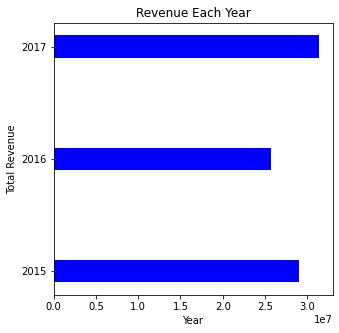

In [105]:
#Total Revenue
data = {'2015':29036749.19, '2016':25730943.59, '2017':31417495.03}
Year = list(data.keys())
Values = list(data.values())
  
fig = plt.figure(figsize = (5, 5))
 

plt.barh(Year, Values, color ='blue',
        height = 0.2)
 
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.title("Revenue Each Year")
plt.grid(False)
plt.show()

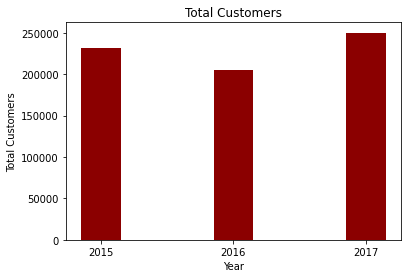

In [106]:
# Total Customers per Year
data = {'2015': 231294,'2016': 204646,'2017': 249987}
x = list(data.keys())
y = list(data.values()) 
fig = plt.figure(figsize = (6, 4))
plt.bar(x, y, width=0.3, color='darkred')
plt.xlabel("Year")
plt.ylabel("Total Customers")
plt.title("Total Customers")
plt.grid(False)
plt.show()

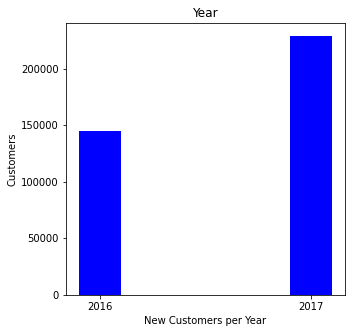

In [107]:
# new customers
data = { '2016':145062, '2017':229028}
Year = list(data.keys())
Values = list(data.values())
  
fig = plt.figure(figsize = (5, 5))
 
# creating the bar plot
plt.bar(Year, Values, color ='blue',
        width = 0.2)
 
plt.xlabel("New Customers per Year")
plt.ylabel("Customers")
plt.title("Year")
plt.grid(False)
plt.show()

***Conclusion:***

* As we observe from the total customer plot there is a loss of customers in 2015 which is followed by a loss in total revenue but in 2017 there is a recovery in both customers and revenue.
